In [1]:
# real in time using of style transfer model
# with the help of the video below
# https://www.youtube.com/watch?v=LWlbFVtPiwo&ab_channel=CODEMENTAL

import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


Metal device set to: Apple M1


2023-02-21 21:29:02.247210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:29:02.247230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


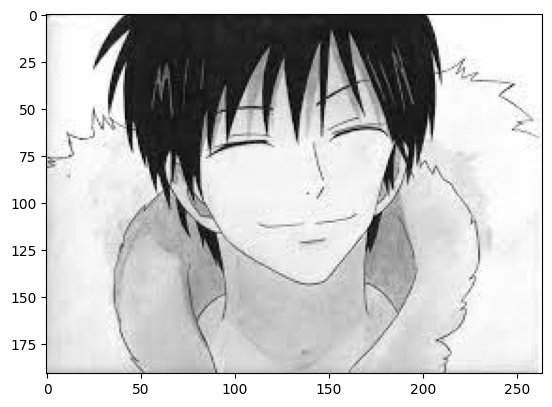

2023-02-21 21:29:02.948676: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-21 21:29:02.950249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


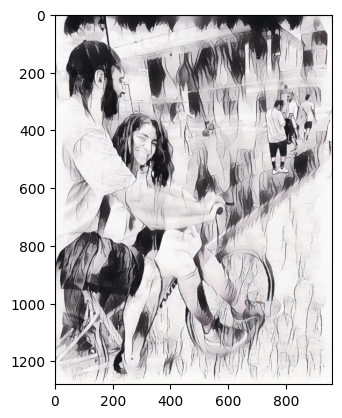

In [3]:
#this part is taken from the Nicholas Renotte tutorial code
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img    

content_image = load_image('Profile')
style_image = load_image('Anime.jpeg')
content_image.shape

plt.imshow(np.squeeze(style_image))
plt.show()

stylized_image = model(tf.constant(content_image), tf.constant(style_image))
plt.imshow(np.squeeze(stylized_image[0]))
plt.show()

In [4]:


def crop_center(image):
    shape = image.shape
    new_shape = min(shape[1], shape[2])
    image = tf.image.central_crop(image, central_fraction=new_shape/shape[1])
    return image

def resize_image_to_square(image_np, image_size=(256,256), preserve_aspect_ratio=True):
    image_np_extra = image_np.astype(np.float32)[np.newaxis, ...]
    if image_np_extra.max() > 1.0:
        image_np_extra = image_np_extra / 255.
    if len(image_np_extra.shape) == 3:
        image_np_extra = tf.stack([image_np_extra, image_np_extra, image_np_extra], axis=-1)
    image_np_extra = crop_center(image_np_extra)
    image_np_extra = tf.image.resize(image_np_extra, image_size, preserve_aspect_ratio=True)
    return image_np_extra


In [5]:
import cv2

frame_size=500
cap = cv2.VideoCapture(0)
while True:
    flag,frame=cap.read()
    if flag:
        image_rgb_np = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        print(image_rgb_np)
        resized_image_np = resize_image_to_square(image_rgb_np, image_size=(frame_size,frame_size))
        
        outputs = model(tf.constant(resized_image_np), tf.constant(style_image))
        
        stylized_image = outputs[0]
        image_pil = tf.keras.preprocessing.image.array_to_img(stylized_image[0])
        
        image_bgr_np=cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)
        cv2.imshow("style transfer", image_bgr_np)
    else:
        print("Something went wrong")
        break
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[[0 0 0]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [2 2 2]]

 ...

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [2 2 2]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[ 89  60  58]
  [ 85  59  53]
  [ 82  55  50]
  ...
  [ 63  56  39]
  [ 62  54  40]
  [ 58  51  36]]

 [[ 89  62  57]
  [ 85  59  53]
  [ 85  59  51]
  ...
  [ 64  57  40]
  [ 59  52  37]
  [ 58  51  36]]

 [[ 85  59  53]
  [ 84  58  50]
  [ 82  56  48]
  ...
  [ 65  58  41]
  [ 59  52  37]
  [ 58  51  36]]

 ...

 [[ 12  21  26]
  [ 14  23  27]
  [ 19  25  30]
  ...
  [149 139 107]
  [143 128 100]
  [136 121  93]]

 [[ 13  20  25]
  [ 13  20  25]
  [ 11  17  22]
  ...
  [149 139 107]
  [143 128 100]
  [135 120  91]]

 [[ 11  17  22]
  [ 14  21  26]
  [ 10  16  21]
  ...
  [149

[[[116  90  77]
  [110  84  71]
  [113  87  75]
  ...
  [ 66  61  41]
  [ 63  59  39]
  [ 59  54  34]]

 [[114  89  74]
  [116  90  75]
  [117  91  78]
  ...
  [ 62  59  39]
  [ 63  59  39]
  [ 62  57  38]]

 [[118  91  76]
  [116  90  75]
  [116  90  77]
  ...
  [ 58  56  36]
  [ 62  57  38]
  [ 67  62  43]]

 ...

 [[ 19  32  43]
  [ 16  32  41]
  [ 12  27  37]
  ...
  [164 154 120]
  [157 144 110]
  [143 130  96]]

 [[ 16  29  39]
  [ 18  31  41]
  [ 19  32  43]
  ...
  [162 152 117]
  [156 141 108]
  [143 128  95]]

 [[ 18  31  41]
  [ 19  32  43]
  [ 22  35  45]
  ...
  [161 151 116]
  [154 139 106]
  [144 130  96]]]
[[[106  82  71]
  [104  81  70]
  [102  78  68]
  ...
  [ 66  64  42]
  [ 63  59  37]
  [ 65  60  38]]

 [[109  86  73]
  [104  81  68]
  [103  80  69]
  ...
  [ 69  66  44]
  [ 59  57  35]
  [ 62  59  37]]

 [[111  88  75]
  [107  83  70]
  [106  82  71]
  ...
  [ 60  58  36]
  [ 62  59  37]
  [ 62  59  37]]

 ...

 [[  8  21  29]
  [  9  22  30]
  [  8  23  33]
  ..

[[[ 38  28  18]
  [ 39  29  17]
  [ 41  31  20]
  ...
  [ 57  62  38]
  [ 61  66  42]
  [ 50  55  31]]

 [[ 41  31  22]
  [ 39  29  17]
  [ 37  27  15]
  ...
  [ 56  61  37]
  [ 60  64  40]
  [ 59  63  39]]

 [[ 39  29  19]
  [ 34  24  15]
  [ 38  28  18]
  ...
  [ 53  57  33]
  [ 57  62  40]
  [ 63  68  46]]

 ...

 [[ 19  28  35]
  [ 21  29  36]
  [ 23  32  38]
  ...
  [160 145 114]
  [151 134 103]
  [144 127  96]]

 [[ 25  31  38]
  [ 27  33  41]
  [ 29  36  43]
  ...
  [158 143 113]
  [152 135 104]
  [144 127  96]]

 [[ 31  37  44]
  [ 31  37  44]
  [ 32  38  45]
  ...
  [158 143 113]
  [152 135 104]
  [144 127  96]]]
[[[ 27  21  18]
  [ 26  20  14]
  [ 31  23  18]
  ...
  [ 56  51  34]
  [ 58  53  35]
  [ 53  48  31]]

 [[ 30  23  20]
  [ 30  24  18]
  [ 31  23  18]
  ...
  [ 59  54  36]
  [ 60  55  38]
  [ 52  47  29]]

 [[ 33  24  21]
  [ 33  24  21]
  [ 33  24  21]
  ...
  [ 63  58  41]
  [ 56  51  34]
  [ 58  53  35]]

 ...

 [[ 24  28  34]
  [ 25  30  35]
  [ 32  37  42]
  ..

[[[ 46  35  31]
  [ 42  32  25]
  [ 45  35  25]
  ...
  [ 66  59  42]
  [ 69  61  45]
  [ 70  63  46]]

 [[ 44  36  31]
  [ 43  35  27]
  [ 44  36  26]
  ...
  [ 72  65  48]
  [ 73  66  49]
  [ 72  65  48]]

 [[ 42  34  28]
  [ 43  35  27]
  [ 47  39  29]
  ...
  [ 73  66  49]
  [ 73  66  49]
  [ 73  66  49]]

 ...

 [[  7  10  11]
  [ 10  12  13]
  [  8  11  12]
  ...
  [150 145 109]
  [143 135 100]
  [134 127  92]]

 [[  7  10  11]
  [  6   9  10]
  [  8  11  12]
  ...
  [145 140 105]
  [140 132  98]
  [134 127  92]]

 [[  5   7   9]
  [  7  10  11]
  [  7  10  11]
  ...
  [144 139 103]
  [139 131  96]
  [134 127  92]]]
[[[125  95  77]
  [120  90  72]
  [124  94  78]
  ...
  [ 68  63  42]
  [ 65  60  38]
  [ 67  62  40]]

 [[120  90  72]
  [123  93  74]
  [125  95  77]
  ...
  [ 70  66  44]
  [ 70  66  44]
  [ 69  65  43]]

 [[121  91  75]
  [124  94  76]
  [127  97  79]
  ...
  [ 73  68  46]
  [ 73  68  48]
  [ 69  64  45]]

 ...

 [[ 28  28  23]
  [ 25  26  21]
  [ 22  23  18]
  ..

[[[ 55  46  29]
  [ 53  43  27]
  [ 54  45  28]
  ...
  [ 63  53  42]
  [ 67  57  45]
  [ 67  57  45]]

 [[ 58  48  32]
  [ 53  44  25]
  [ 51  41  23]
  ...
  [ 60  50  38]
  [ 62  52  41]
  [ 66  56  44]]

 [[ 55  46  29]
  [ 55  46  27]
  [ 56  47  29]
  ...
  [ 62  52  41]
  [ 63  53  42]
  [ 68  58  46]]

 ...

 [[ 31  23  14]
  [ 47  39  29]
  [ 53  45  38]
  ...
  [152 147 114]
  [143 135 102]
  [131 123  90]]

 [[ 29  21  11]
  [ 36  28  18]
  [ 40  31  24]
  ...
  [151 146 113]
  [141 133 101]
  [133 125  93]]

 [[ 29  21  11]
  [ 33  25  15]
  [ 31  23  16]
  ...
  [150 144 111]
  [143 135 102]
  [136 128  95]]]
[[[ 42  37  22]
  [ 48  43  26]
  [ 47  42  25]
  ...
  [ 62  58  34]
  [ 66  61  39]
  [ 68  63  42]]

 [[ 47  42  25]
  [ 48  43  26]
  [ 46  41  24]
  ...
  [ 61  57  32]
  [ 62  58  36]
  [ 66  61  39]]

 [[ 47  42  25]
  [ 47  42  25]
  [ 51  46  28]
  ...
  [ 66  61  37]
  [ 65  60  38]
  [ 67  62  40]]

 ...

 [[ 37  30  31]
  [ 39  32  34]
  [ 42  36  37]
  ..

[[[ 66  50  33]
  [ 65  49  30]
  [ 66  50  31]
  ...
  [ 54  49  32]
  [ 62  54  38]
  [ 66  59  42]]

 [[ 68  52  32]
  [ 64  48  29]
  [ 65  49  30]
  ...
  [ 56  51  34]
  [ 61  56  39]
  [ 65  60  42]]

 [[ 66  50  31]
  [ 70  54  35]
  [ 70  54  35]
  ...
  [ 63  58  41]
  [ 67  62  47]
  [ 69  64  49]]

 ...

 [[ 11   7  12]
  [ 13   8  11]
  [ 13   8  11]
  ...
  [159 151 116]
  [153 142 108]
  [143 133  99]]

 [[ 14   9  14]
  [ 14   9  14]
  [ 14   9  14]
  ...
  [158 150 115]
  [153 142 108]
  [146 135 101]]

 [[ 15  10  16]
  [ 15  10  16]
  [ 14   9  14]
  ...
  [158 150 115]
  [150 140 106]
  [147 137 102]]]
[[[ 71  50  34]
  [ 69  48  32]
  [ 71  50  34]
  ...
  [ 58  55  38]
  [ 63  58  41]
  [ 66  61  43]]

 [[ 71  50  34]
  [ 68  47  31]
  [ 69  48  32]
  ...
  [ 64  61  43]
  [ 64  61  43]
  [ 63  60  42]]

 [[ 74  53  37]
  [ 70  49  33]
  [ 71  50  34]
  ...
  [ 63  60  42]
  [ 59  56  41]
  [ 60  58  42]]

 ...

 [[ 16  12  13]
  [ 14  10  10]
  [ 16   9  10]
  ..

[[[ 46  41  24]
  [ 41  37  17]
  [ 41  37  17]
  ...
  [ 62  54  38]
  [ 59  52  35]
  [ 65  58  41]]

 [[ 47  42  25]
  [ 44  39  19]
  [ 40  35  16]
  ...
  [ 55  50  33]
  [ 58  53  35]
  [ 62  57  40]]

 [[ 46  41  24]
  [ 45  40  20]
  [ 42  38  18]
  ...
  [ 59  54  36]
  [ 61  56  39]
  [ 61  56  39]]

 ...

 [[ 15   0  23]
  [  9   0  17]
  [ 10   0  18]
  ...
  [148 138 103]
  [142 129  95]
  [132 120  86]]

 [[ 16   1  24]
  [ 12   0  18]
  [ 14   0  20]
  ...
  [148 138 103]
  [143 130  99]
  [133 121  89]]

 [[ 19   3  27]
  [ 15   0  21]
  [ 15   0  21]
  ...
  [148 138 103]
  [142 129  97]
  [133 121  89]]]
[[[ 42  37  22]
  [ 36  33  18]
  [ 42  39  23]
  ...
  [ 52  47  27]
  [ 58  53  33]
  [ 61  56  37]]

 [[ 44  38  23]
  [ 39  37  21]
  [ 43  40  25]
  ...
  [ 55  50  31]
  [ 61  56  37]
  [ 59  54  34]]

 [[ 44  38  23]
  [ 41  38  22]
  [ 39  37  21]
  ...
  [ 59  54  34]
  [ 60  55  38]
  [ 59  54  36]]

 ...

 [[ 20   8  18]
  [ 19   7  17]
  [ 20   9  16]
  ..

[[[101  77  67]
  [ 94  70  60]
  [100  76  65]
  ...
  [ 50  50  36]
  [ 48  47  34]
  [ 50  50  36]]

 [[103  80  69]
  [101  77  67]
  [103  80  69]
  ...
  [ 55  54  41]
  [ 56  56  42]
  [ 59  58  44]]

 [[101  77  67]
  [103  80  69]
  [104  81  70]
  ...
  [ 50  50  36]
  [ 54  53  40]
  [ 56  56  42]]

 ...

 [[ 30  34  40]
  [ 17  23  28]
  [ 19  25  33]
  ...
  [138 130  97]
  [133 122  90]
  [125 114  82]]

 [[ 19  24  31]
  [ 18  22  30]
  [ 21  25  33]
  ...
  [142 132 100]
  [134 124  92]
  [125 114  82]]

 [[ 23  27  35]
  [ 25  29  37]
  [ 21  25  33]
  ...
  [142 132 100]
  [134 124  92]
  [123 113  81]]]
[[[103  89  70]
  [101  87  67]
  [103  89  70]
  ...
  [ 49  49  35]
  [ 52  51  37]
  [ 55  54  41]]

 [[103  90  67]
  [ 98  85  63]
  [101  87  65]
  ...
  [ 50  50  36]
  [ 56  56  42]
  [ 57  57  43]]

 [[103  90  67]
  [100  86  64]
  [ 96  83  60]
  ...
  [ 47  46  33]
  [ 50  50  36]
  [ 55  54  41]]

 ...

 [[ 42  44  50]
  [ 47  49  55]
  [ 49  51  57]
  ..

[[[ 41  31  24]
  [ 40  30  23]
  [ 44  33  28]
  ...
  [ 53  51  33]
  [ 58  53  35]
  [ 56  51  34]]

 [[ 46  36  29]
  [ 40  31  24]
  [ 41  32  27]
  ...
  [ 56  53  35]
  [ 57  54  36]
  [ 55  52  34]]

 [[ 46  36  29]
  [ 49  41  33]
  [ 44  36  31]
  ...
  [ 59  57  39]
  [ 59  57  39]
  [ 57  54  36]]

 ...

 [[ 17  17  19]
  [ 17  17  19]
  [ 20  20  20]
  ...
  [145 137 104]
  [137 124  95]
  [126 113  84]]

 [[ 20  20  22]
  [ 20  20  20]
  [ 25  26  25]
  ...
  [145 137 104]
  [137 124  95]
  [129 116  87]]

 [[ 24  24  26]
  [ 23  23  23]
  [ 28  28  28]
  ...
  [141 133 101]
  [135 122  93]
  [129 116  87]]]
[[[ 49  36  34]
  [ 49  36  34]
  [ 49  36  34]
  ...
  [ 58  56  33]
  [ 59  57  35]
  [ 58  56  33]]

 [[ 50  37  35]
  [ 49  36  34]
  [ 51  38  36]
  ...
  [ 62  59  37]
  [ 62  59  37]
  [ 58  56  33]]

 [[ 51  38  36]
  [ 50  37  35]
  [ 50  37  35]
  ...
  [ 62  59  37]
  [ 63  61  38]
  [ 62  59  37]]

 ...

 [[130 112 134]
  [125 108 127]
  [129 111 131]
  ..